In [193]:
# pip install pca

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
from pca import pca
from yellowbrick.features.pca import PCADecomposition

In [195]:
data = pd.read_csv("Final_data.csv", header = 0)

In [196]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [197]:
print("\nBrakujące wartości:")
print(data.isnull().sum())


Brakujące wartości:
Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving

In [198]:
# dane nie zawierają brakujących wartości

In [199]:
print("\nStatystyki opisowe:")
data.describe()


Statystyki opisowe:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


In [200]:
data['Age'] = data['Age'].astype(int)

In [201]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  int64  
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

None

In [202]:
np.array(data.columns)

array(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type',
       'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g',
       'cooking_method', 'prep_time_min', 'cook_time_min', 'rating',
       'Name of Exercise', 'Sets', 'Reps', 'Benefit',
       'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part',
       'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros',
       'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR',
       'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype=object)

In [203]:
# teraz zobaczymy korelacje między kolumnami numerycznymi

In [204]:
data_numeric = data.select_dtypes(include=[np.number])

In [205]:
data_numeric.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
0,34,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,26.800377,1.50,...,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19
1,23,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,27.655021,1.90,...,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20
2,33,58.98,1.67,175.04,123.95,54.96,0.91,802.26,24.320821,1.88,...,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20
3,38,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,32.813572,2.50,...,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19
4,45,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,17.307319,2.91,...,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19


In [206]:
data_numeric.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise',
       'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min',
       'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'BMI_calc',
       'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR',
       'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc'],
      dtype='object')

In [207]:
data_numeric.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise',
       'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min',
       'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'BMI_calc',
       'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR',
       'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc'],
      dtype='object')

In [208]:
correlation_matrix = data_numeric.corr()

In [209]:
correlation_matrix

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
Age,1.000000,-0.044185,-0.036983,-0.028881,0.039725,0.013049,-0.025162,-0.021163,-0.025357,0.037734,...,-0.017084,0.051729,-0.005216,0.067129,0.044742,0.048559,-0.016237,-0.050586,-0.025743,-0.021258
Weight (kg),-0.044185,1.000000,0.353763,0.066898,0.016761,-0.033578,-0.002275,-0.001994,0.778875,0.397971,...,0.855598,-0.003569,-0.001333,-0.726714,-0.016656,-0.023117,0.736698,0.981897,0.024249,0.253594
Height (m),-0.036983,0.353763,1.000000,-0.014397,-0.012135,0.009897,0.006783,0.009211,-0.156586,0.398041,...,-0.167014,0.008076,0.012513,-0.246187,-0.012385,-0.005411,0.254356,0.477397,0.029134,0.103753
Max_BPM,-0.028881,0.066898,-0.014397,1.000000,-0.028047,0.035522,0.009767,0.003136,0.071926,0.041635,...,0.073526,-0.010566,-0.004370,-0.055962,-0.511858,-0.559433,0.043785,0.060146,0.003512,-0.029670
Avg_BPM,0.039725,0.016761,-0.012135,-0.028047,1.000000,0.063042,0.018553,0.007984,0.009022,0.006192,...,0.028931,0.033147,-0.005017,0.018102,0.856732,0.841887,0.005324,0.012083,-0.005375,-0.058295
Resting_BPM,0.013049,-0.033578,0.009897,0.035522,0.063042,1.000000,-0.017554,-0.001633,-0.042021,0.011676,...,-0.040731,0.042500,-0.016604,0.065700,-0.088468,0.034978,-0.024921,-0.030811,-0.004718,-0.000931
Session_Duration (hours),-0.025162,-0.002275,0.006783,0.009767,0.018553,-0.017554,1.000000,0.814368,-0.034861,0.287751,...,-0.004282,0.010536,0.007848,-0.042841,0.017835,0.010953,-0.528619,0.025165,0.944115,-0.030851
Calories_Burned,-0.021163,-0.001994,0.009211,0.003136,0.007984,-0.001633,0.814368,1.000000,-0.033812,0.262731,...,-0.004495,0.011817,0.009419,-0.035982,0.010506,0.006106,-0.660560,0.023134,0.773932,-0.013504
Fat_Percentage,-0.025357,0.778875,-0.156586,0.071926,0.009022,-0.042021,-0.034861,-0.033812,1.000000,0.185207,...,0.902341,-0.012551,-0.003533,-0.603368,-0.020686,-0.030786,0.594499,0.659078,-0.018944,0.178974
Water_Intake (liters),0.037734,0.397971,0.398041,0.041635,0.006192,0.011676,0.287751,0.262731,0.185207,1.000000,...,0.214090,0.045292,0.006100,-0.281664,-0.019804,-0.018205,0.126435,0.435249,0.281376,0.072807


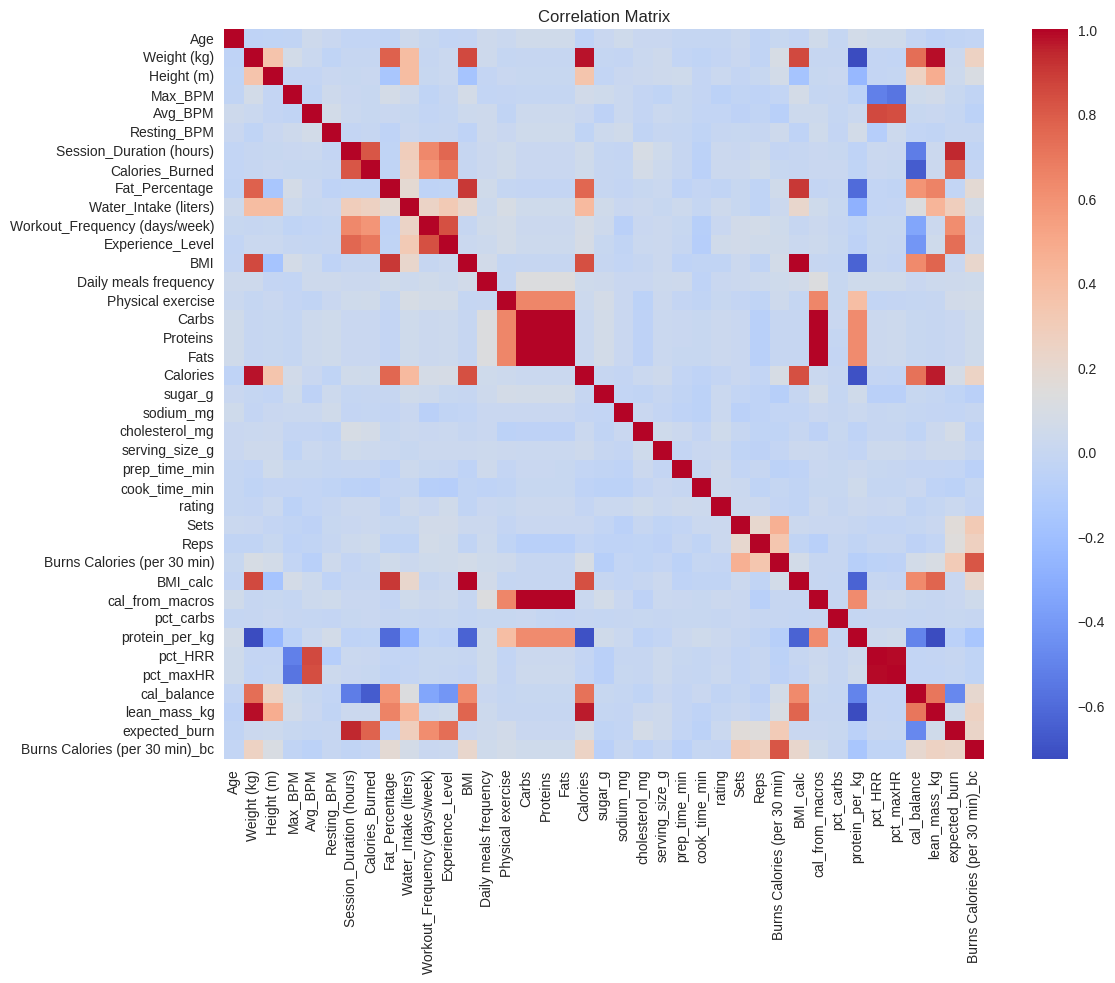

In [210]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [211]:
"""
będziemy szukać największych korelacji między kolumnami
pojawi się drobny problem:
maksymalną korelację (wartość 1) zawsze będziemy mieć między daną kolumną a nią samą
żeby pozbyć się tego problemu, wypełnimy na razie diagonalę zerami
"""

np.fill_diagonal(correlation_matrix.values, 0)

In [212]:
correlation_matrix.stack().head()

Age  Age            0.000000
     Weight (kg)   -0.044185
     Height (m)    -0.036983
     Max_BPM       -0.028881
     Avg_BPM        0.039725
dtype: float64

In [213]:
abs(correlation_matrix).stack().sort_values(ascending=False).head(30)

,,0
BMI,BMI_calc,1.000000
BMI_calc,BMI,1.000000
cal_from_macros,Carbs,0.999924
Carbs,cal_from_macros,0.999924
cal_from_macros,Fats,0.999848
Fats,cal_from_macros,0.999848
Proteins,cal_from_macros,0.999803
cal_from_macros,Proteins,0.999803
Proteins,Fats,0.999608
Fats,Proteins,0.999608


Największe korelacje w grupach:

---

1. Powyżej 0.95:

*   BMI = BMI calc
*   cal_from_macros - Carbs - Fats - Proteins
*   pct_maxHR - pct_HRR
*   lean_mass_kg - Weight(kg) - Calories

---

2. Między 0.9 a 0.95:

*   Session_Duration (hours), expected_burn
*   Fat_Percentage - BMI = BMI_calc






In [214]:
data_workout = data[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Sets', 'Reps', 'pct_HRR', 'expected_burn']]

In [215]:
data_workout.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Sets,Reps,pct_HRR,expected_burn
0,34,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,26.800377,1.50,3.99,2.01,24.87,4.99,20.91,0.741237,685.1600
1,23,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,27.655021,1.90,4.00,2.01,23.48,4.01,16.15,0.551247,978.6184
2,33,58.98,1.67,175.04,123.95,54.96,0.91,802.26,24.320821,1.88,2.99,1.02,21.15,5.00,21.90,0.574534,654.5266
3,38,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,32.813572,2.50,3.99,1.99,32.45,4.01,16.92,0.744155,773.6300
4,45,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,17.307319,2.91,4.00,2.00,14.83,4.99,15.01,0.668405,711.4176


In [216]:
data_workout_numeric = data_workout.select_dtypes(include=[np.number])

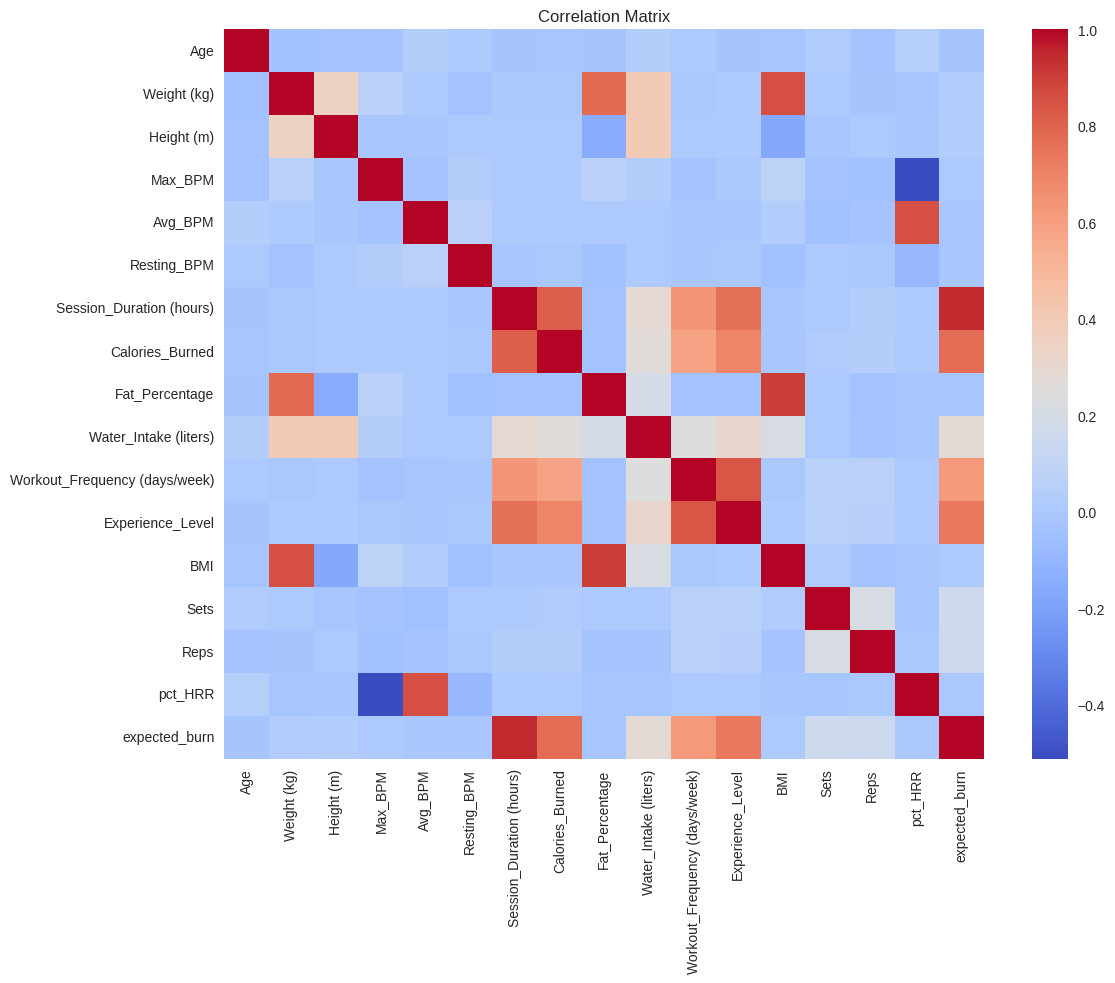

In [217]:
plt.figure(figsize=(12,10))
sns.heatmap(data_workout_numeric.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [218]:
abs(data_workout_numeric.corr()).stack().sort_values(ascending=False)[len(data_workout_numeric.columns):].head(10)

,,0
expected_burn,Session_Duration (hours),0.944115
Session_Duration (hours),expected_burn,0.944115
Fat_Percentage,BMI,0.902341
BMI,Fat_Percentage,0.902341
pct_HRR,Avg_BPM,0.856732
Avg_BPM,pct_HRR,0.856732
Weight (kg),BMI,0.855599
BMI,Weight (kg),0.855599
Workout_Frequency (days/week),Experience_Level,0.836127
Experience_Level,Workout_Frequency (days/week),0.836127


In [219]:
features = data_workout_numeric.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_workout_numeric[features])

In [220]:
pca_model = PCA()
X_pca = pca_model.fit_transform(X_scaled)

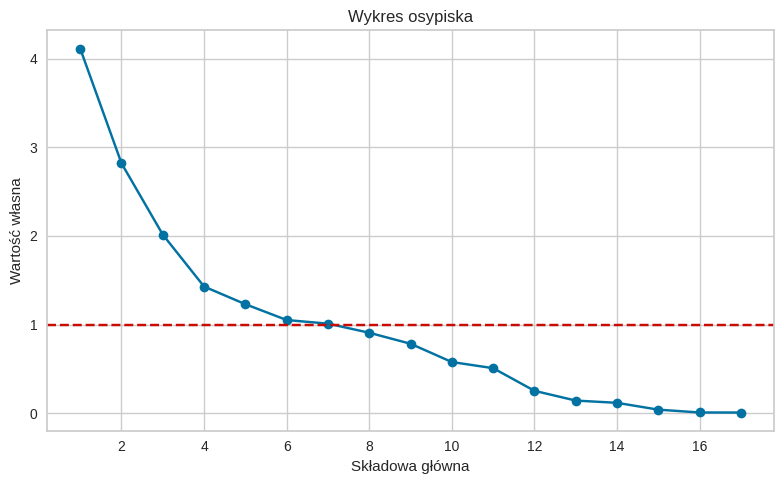

In [221]:
plt.figure(figsize=(8,5))
eigenvalues = pca_model.explained_variance_
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', linestyle='-')
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Składowa główna')
plt.ylabel('Wartość własna')
plt.title('Wykres osypiska')
plt.grid(True)
plt.tight_layout()
plt.show()

In [222]:
threshold = 0.70
components_threshold = np.argmax(np.cumsum(pca_model.explained_variance_ratio_) >= threshold) + 1
print(f"\nNumber of components to explain {threshold*100}% variance: {components_threshold}")


Number of components to explain 70.0% variance: 6
